In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [5]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1
print('category: ', category)
print('train set :', len(X_train))
print('test set : ', len(X_test))

category:  46
train set : 8982
test set :  2246


In [6]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = utils.to_categorical(y_train) #원핫인코딩으로 바꾸겠다
y_test = utils.to_categorical(y_test)

In [8]:
model = models.Sequential()
model.add(layers.Embedding(1000, 100))
model.add(layers.LSTM(100, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 4*((output + input)*output )

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, batch_size = 100, epochs=20,
                   validation_data=(X_test, y_test))

Epoch 1/20
90/90 [==============================] - 10s 112ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 9s 99ms/step - loss: 2.0351 - accuracy: 0.4904 - val_loss: 1.9314 - val_accuracy: 0.5062
Epoch 3/20
90/90 [==============================] - 9s 95ms/step - loss: 1.8896 - accuracy: 0.5153 - val_loss: 1.8188 - val_accuracy: 0.5227
Epoch 4/20
90/90 [==============================] - 8s 92ms/step - loss: 1.7248 - accuracy: 0.5533 - val_loss: 1.7089 - val_accuracy: 0.5588
Epoch 5/20
90/90 [==============================] - 8s 92ms/step - loss: 1.6690 - accuracy: 0.5749 - val_loss: 1.7092 - val_accuracy: 0.5735
Epoch 6/20
90/90 [==============================] - 8s 92ms/step - loss: 1.6266 - accuracy: 0.5853 - val_loss: 1.6125 - val_accuracy: 0.6051
Epoch 7/20
90/90 [==============================] - 9s 97ms/step - loss: 1.4977 - accuracy: 0.6204 - val_loss: 1.5190 - val_accuracy: 0.6327
Epoch 8/20


In [19]:
print('Test Accuracy : %4.f' %(model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 17ms/step - loss: 1.2318 - accuracy: 0.7102
Test Accuracy :    1


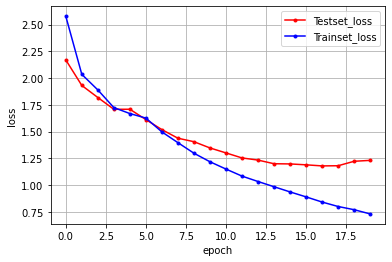

In [20]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()